In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

# Digits Dataset Logistic Regression

In [2]:
digits = load_digits()

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


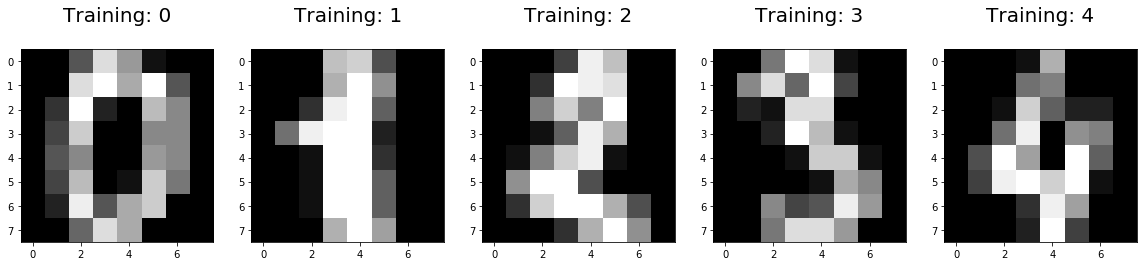

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [6]:
logisticreg_model = linear_model.LogisticRegression(C=0.01,max_iter=1500)

In [7]:
logisticreg_model.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
train_acc_ovr = logisticreg_model.score(x_train, y_train)
test_acc_ovr = logisticreg_model.score(x_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(train_acc_ovr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_acc_ovr), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.99
Modelin test verisindeki doğruluğu   : 0.96


In [9]:
train_pred = logisticreg_model.predict(x_train)
test_pred = logisticreg_model.predict(x_test)

conf_mtrx_digits_test = pd.DataFrame(confusion_matrix(y_test,test_pred))
conf_mtrx_digits_train = pd.DataFrame(confusion_matrix(y_train,train_pred))

In [10]:
print("Digits dataset confusion matrix for test set")
conf_mtrx_digits_test

Digits dataset confusion matrix for test set


,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,1,0,1,1
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,37,0,0,1,0,0
5,0,0,0,0,0,46,0,0,0,2
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,2,0,0,46,0,0
8,0,3,1,0,0,0,0,0,44,0
9,0,0,0,0,0,1,0,0,0,46


In [11]:
print("Digits dataset confusion matrix for train set")
conf_mtrx_digits_train

Digits dataset confusion matrix for train set


,0,1,2,3,4,5,6,7,8,9
0,141,0,0,0,0,0,0,0,0,0
1,0,138,0,0,0,0,0,0,1,0
2,0,0,133,0,0,0,0,0,0,0
3,0,0,0,138,0,0,0,0,0,0
4,0,0,0,0,143,0,0,0,0,0
5,0,0,0,0,0,134,0,0,0,0
6,0,0,0,0,0,0,128,0,1,0
7,0,0,0,0,0,0,0,131,0,0
8,0,3,0,0,0,0,0,0,123,0
9,0,0,0,0,0,1,0,0,1,131


In [12]:
metrics_digits = pd.DataFrame(precision_recall_fscore_support(y_test,test_pred))
metrics_digits.index = ["Precision","Recall","F1 Score","?"]
metrics_digits

,0,1,2,3,4,5,6,7,8,9
Precision,1.0,0.909091,0.977778,1.000000,0.948718,0.978723,0.980769,0.978723,0.956522,0.920000
Recall,1.0,0.930233,1.000000,0.955556,0.973684,0.958333,0.980769,0.958333,0.916667,0.978723
F1 Score,1.0,0.919540,0.988764,0.977273,0.961039,0.968421,0.980769,0.968421,0.936170,0.948454
?,37.0,43.000000,44.000000,45.000000,38.000000,48.000000,52.000000,48.000000,48.000000,47.000000


In [38]:
digits_precision = precision_score(y_test,test_pred,average="weighted")
digits_recall = recall_score(y_test,test_pred,average="weighted")
digits_f1 = f1_score(y_test,test_pred,average="weighted")

digits_weighted_score = pd.DataFrame([digits_precision,digits_recall,digits_f1])
digits_weighted_score.index = ["Precision","Recall","F1"]
digits_weighted_score.columns = ["Value"]
digits_weighted_score

,Value
Precision,0.965055
Recall,0.964444
F1,0.964499


# MNIST

In [13]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [14]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

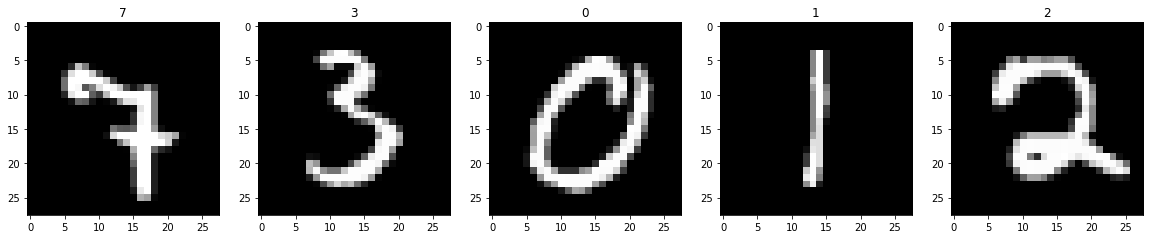

In [15]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(train_lbl[index])

In [16]:
logisticreg_mnist = linear_model.LogisticRegression(C=0.0001,solver='saga')

In [17]:
logisticreg_mnist.fit(train_img,train_lbl)

C:\Users\enes_\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
train_acc_ovr_mnist = logisticreg_mnist.score(train_img, train_lbl)
test_acc_ovr_mnist = logisticreg_mnist.score(test_img, test_lbl)
print('Saga', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(train_acc_ovr_mnist), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_acc_ovr_mnist), sep='\n')

Saga
--------------------
Modelin eğitim verisindeki doğruluğu : 0.94
Modelin test verisindeki doğruluğu   : 0.92


In [20]:
test_predictions = logisticreg_mnist.predict(test_img)
train_predictions = logisticreg_mnist.predict(train_img)

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, test_predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

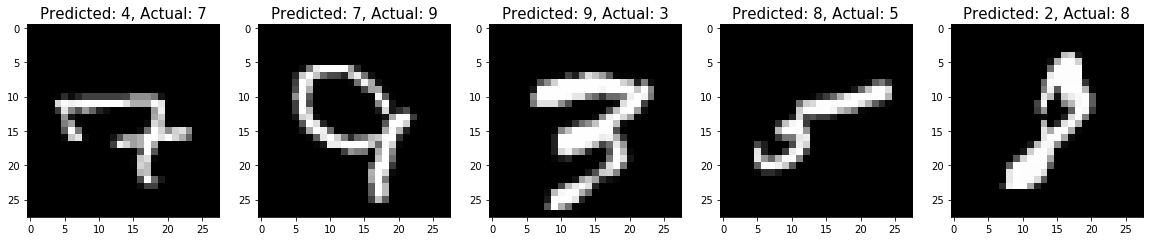

In [21]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(test_predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [22]:
conf_mtrx_train = confusion_matrix(train_lbl,train_predictions)
conf_mtrx_test  = confusion_matrix(test_lbl,test_predictions)

In [23]:
conf_mtrx_train = pd.DataFrame(conf_mtrx_train)
conf_mtrx_test = pd.DataFrame(conf_mtrx_test)
print("Confusion Matrix (Train set)")
conf_mtrx_train


Confusion Matrix (Train set)


,0,1,2,3,4,5,6,7,8,9
0,5785,1,10,7,11,24,24,10,31,4
1,1,6595,23,21,7,15,6,11,50,7
2,23,42,5478,78,56,19,47,57,132,18
3,19,13,112,5617,6,159,15,41,103,43
4,9,20,25,10,5543,8,42,11,38,156
5,44,19,35,162,47,4857,71,16,157,42
6,30,11,34,1,28,61,5694,6,20,2
7,7,20,60,20,39,6,3,5891,18,165
8,28,70,56,124,17,130,32,21,5327,57
9,22,23,12,71,111,31,3,126,40,5550


In [24]:
print("Confusion Matrix (Test set)")
conf_mtrx_test

Confusion Matrix (Test set)


,0,1,2,3,4,5,6,7,8,9
0,968,0,1,2,1,8,9,0,7,0
1,0,1112,5,3,1,5,1,4,8,2
2,4,13,931,19,12,1,16,9,33,2
3,1,4,34,895,0,24,2,12,27,14
4,1,2,5,1,894,1,12,9,8,29
5,10,2,7,31,9,746,16,5,30,7
6,8,3,6,0,11,16,940,1,4,0
7,4,5,14,3,12,3,1,975,4,43
8,4,18,8,19,5,27,10,2,858,12
9,4,5,6,10,34,7,2,28,8,865


In [25]:
print("Precision score on train set :",precision_score(train_lbl,train_predictions,average="weighted"))

print("Precision score on test set  :",precision_score(test_lbl,test_predictions,average="weighted"))

Precision score on train set : 0.9388610966203732
Precision score on test set  : 0.9183206407480365


In [26]:
print("Recall score on train set :",recall_score(train_lbl,train_predictions,average="weighted"))

print("Recall score on test set  :",recall_score(test_lbl,test_predictions,average="weighted"))

Recall score on train set : 0.93895
Recall score on test set  : 0.9184


In [27]:
print("F1 score on train set :",f1_score(train_lbl,train_predictions,average="weighted"))

print("F1 score on test set  :",f1_score(test_lbl,test_predictions,average="weighted"))


F1 score on train set : 0.9388715812581742
F1 score on test set  : 0.9182616434712138


In [28]:
classification_report(test_lbl,test_predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       996\n           1       0.96      0.97      0.96      1141\n           2       0.92      0.90      0.91      1040\n           3       0.91      0.88      0.90      1013\n           4       0.91      0.93      0.92       962\n           5       0.89      0.86      0.88       863\n           6       0.93      0.95      0.94       989\n           7       0.93      0.92      0.92      1064\n           8       0.87      0.89      0.88       963\n           9       0.89      0.89      0.89       969\n\n    accuracy                           0.92     10000\n   macro avg       0.92      0.92      0.92     10000\nweighted avg       0.92      0.92      0.92     10000\n'

In [29]:
metrics_mnist = pd.DataFrame(precision_recall_fscore_support(test_lbl,test_predictions))
metrics_mnist.index = ["Precision","Recall","F1 Score","?"]
metrics_mnist

,0,1,2,3,4,5,6,7,8,9
Precision,0.964143,0.955326,0.915438,0.910478,0.913177,0.890215,0.931615,0.933014,0.869301,0.888090
Recall,0.971888,0.974584,0.895192,0.883514,0.929314,0.864426,0.950455,0.916353,0.890966,0.892673
F1 Score,0.968000,0.964859,0.905202,0.896794,0.921175,0.877131,0.940941,0.924609,0.880000,0.890376
?,996.000000,1141.000000,1040.000000,1013.000000,962.000000,863.000000,989.000000,1064.000000,963.000000,969.000000
